Number of total class 0 , 1,2,..,9


In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense


Load dataset

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


Convert to categorical

In [4]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


Sequential mode & Model summary

In [5]:
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


model_temp = Sequential()

# Input Layer
# model_temp.add(layers.Dense(128, input_shape=(x_train.shape[1] * x_train.shape[2],)))
# model_temp.add(layers.Activation('relu'))

# Hidden Layer
# model_temp.add(layers.Dense(128))
# model_temp.add(layers.Activation('relu'))

# Output Layer
# model_temp.add(layers.Dense(10))
# model_temp.add(layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Compile model & Train model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 42s 96ms/step - loss: 0.3588 - accuracy: 0.8910 - val_loss: 0.0840 - val_accuracy: 0.9757
Epoch 2/15
422/422 [==============================] - 41s 96ms/step - loss: 0.1139 - accuracy: 0.9652 - val_loss: 0.0577 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0837 - accuracy: 0.9741 - val_loss: 0.0496 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.0403 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0338 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0504 - accuracy: 0.9838 - val_loss: 0.0354 - val_accuracy:

Plot accuracy & Plot loss

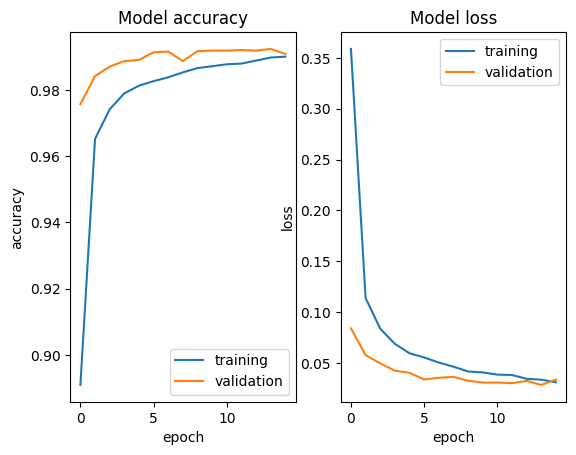

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')